# PSA demodulation Numpy vs OpenCV
aqui comparamos los tiempos de un demodulador PSA iplementado numpy o openCV

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [40]:
def calculateTestPhasor(z_size=(512, 511), T=(30, 30), amplitude=100, bkg = 128, phase_shift = np.zeros(1), sigma_factor=(0.3, 0.3)):
    """!
    @brief this funcion calculates a test phasor for PFA methods
    @details aux function for calculating complex phasors. The phasor is a monochromatic signal of period T
    the modulation is a gaussian centered at 0.5*(norws, ncols) and the maximum amplitude is given by amplitude
    @param z_size [(512, 511)] tuple (NR, NC) px phasor size
    @param T [(30, 30)] tuple (Tx, Ty) px fringe period
    @param sigma_factor [(0.3, 0.3)] tuple modulation sigma_x,sigma_y = sigma_factor * z_size
    @param amplitude [100] GV phasor max amplitude
    @return z  phasor z=m*exp(i*phi)
    @return m phasor modulation = Gauss(0, 0, sigma_x,sigma_y)
    @author AQ 2021
    """
    # setup meshgrid and phasor
    NR, NC = z_size
    x = np.arange(0, NC)
    x = x - 0.5 * NC
    y = np.arange(0, NR)
    y = y - 0.5 * NR

    X, Y = np.meshgrid(x, y)

    # fringe period in Px
    Tx, Ty = T

    # phase, background and modulation
    phi = 2 * np.pi * (X / Tx + Y / Ty)
    factor_x, factor_y = sigma_factor
    sigma_x, sigma_y = (factor_x * NC, factor_y * NR)  # px
    m = amplitude * np.exp(-X ** 2 / (2 * sigma_x ** 2) - Y ** 2 / (2 * sigma_y ** 2))
    z = m * (np.cos(phi) + 1j * np.sin(phi))
    
    nIgrams=phase_shift.size
    g= np.zeros((nIgrams, NR, NC))
    for n in range(nIgrams):
        g[n] = bkg + m * np.cos(phi+phase_shift[n])
        
    return z, g, m

In [47]:
zSize=(1000, 1001)
z, g, m = calculateTestPhasor(z_size=zSize)

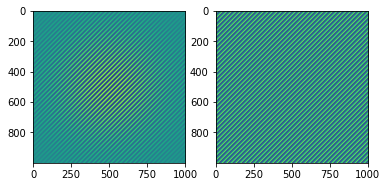

In [48]:
plt.subplot(121);plt.imshow(g[0]) # expect true color
plt.subplot(122);plt.imshow(np.angle(z)) 
plt.show()

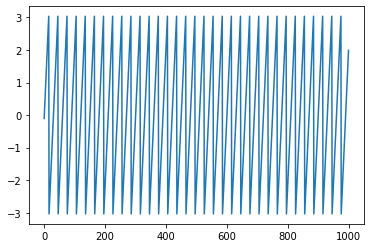

In [70]:
plt.plot(np.angle(z[400]))
plt.show()

In [49]:
hPSA4LS=np.array([1, 1j, -1, -1j])

In [35]:
x=np.zeros(1)

In [36]:
x

array([0.])

In [37]:
2*x

array([0.])